# **Recurrent Neural Networks**

## Abstract

This notebook explores the recurrent neural network architecture, as well as some variations aimed at improving its performance, and finally implementing it using Keras to perform sentiment analysis on the IMDb movie reviews dataset.

## Table of Contents

>[Recurrent Neural Networks](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=bnENdKhVV335)

>>[Abstract](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=M3IxekE9V8Nx)

>>[Table of Contents](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=_OPUvArhV9lb)

>>[Introduction](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=2ZK8D53MWPTu)

>>[Sequence Modelling Applications in NLP](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=mRZy2n2QXGL6)

>>[From Feedforward to Recurrent Neural Nets](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=-QRNxLLBbXVy)

>>[RNNs Formalization](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=Jht9bp-KiXB3)

>>[RNNs Training](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=tzkOkS1DlC4g)

>>>[Exploading Gradients Problem](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=3b4MHailoGEy)

>>>[Vanishing Gradients Problem](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=zFe5iKJwoIli)

>>[RNNs Variations](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=b9O0ELgRqm4z)

>>>[Multi-layer RNNs](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=HU5PFmHFqpE3)

>>>[Bidirectional RNNs](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=DAPe_oE8qr6b)

>>[LSTMs and GRUs](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=z78LV9gSwHpj)

>>[Implementation](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=_T6MK1eW0JCQ)

>>>[Dataset Preparation](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=K2wVKCH92KeS)

>>>[Model Creation](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=J8NBGOgd2MmJ)

>>>[Training](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=F-GwZTcR2OTO)

>>[References](#folderId=1dl-7XaGtUqNeAG7SclqhlVee707_wGXB&updateTitle=true&scrollTo=gU6XDL1pXLw8)



## Introduction

Language is inherently sequential. It can be split up into a sequence of words. Thus, neural sequential modelling would prove useful in creating a good language model.

A **recurrent neural network** (RNN) is a neural network that contains a cycle within its network connections, meaning that the value of some unit is directly, or indirectly, dependent on its own earlier outputs. This cyclic connection encodes the notion of a relationship between the time steps in isolation.

In other words, the output at some time step is related to its input as well as those of the previous time steps. This interdependence is captured by relating the network’s computation at a particular time step to the network’s prior history and its memory of the computations at those previous time steps. This is practically achieved by having an internal memory or state which can be passed forward across in time. 





## Sequence Modelling Applications in NLP

Up until this point, we've used feedforward neural nets to operate in a one-to-one input-output fixed setting.

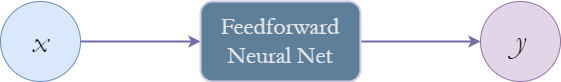

In this example, there's no real component of time or sequence. In contrast, with sequence modelling, we can handle a variety of different problems where we have a sequence of temporal inputs and potentially a sequential output. 

For instance, many-to-one sequence modelling may consist of sentiment classifications; while many-to-many may be a machine translation task as shown below.  

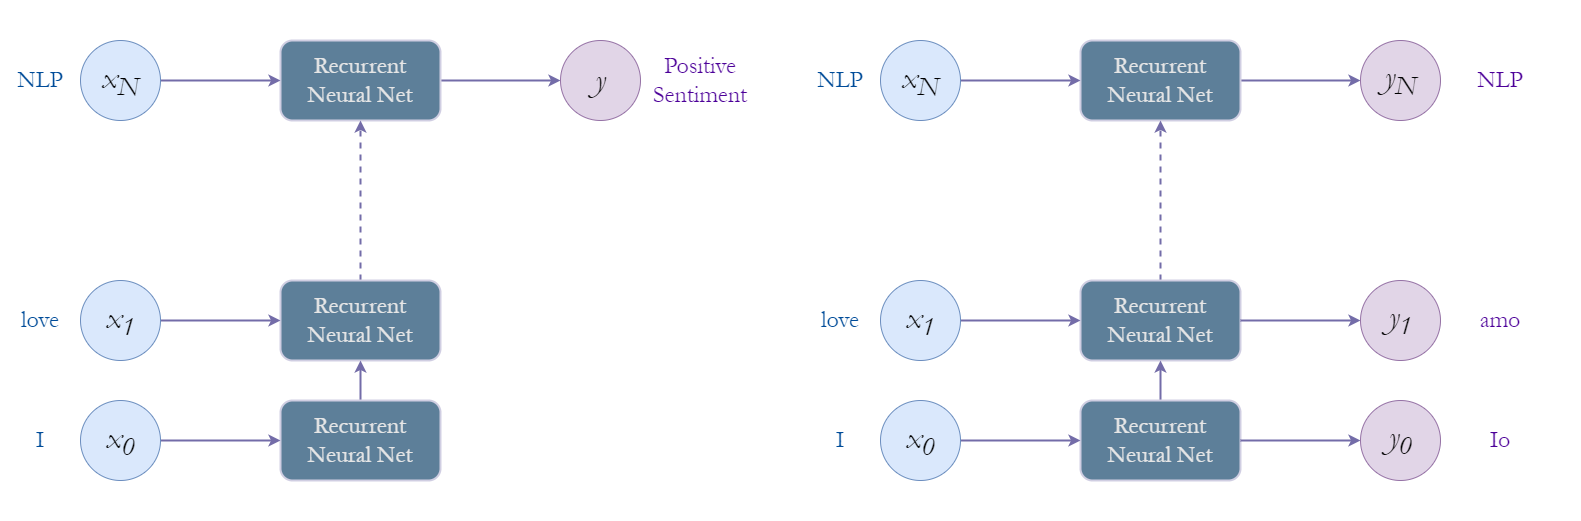

## From Feedforward to Recurrent Neural Nets

In the example shown below, we have a simple feedforward neural net consisting of an input layer, one (or more) hidden layers, and an output layer. This feedforward model still has no notion of time or sequence.

We simplify the diagram by collapsing the neuron layers to be represented as vectors $\bar x^t \in R^m$ and $\bar y^t \in R^n$.

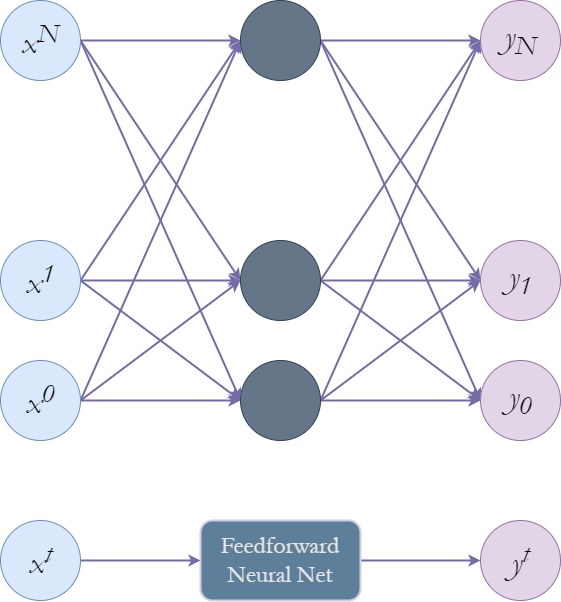

At this point, we can apply this same feedforward neural model to each time step in our sequential data. 

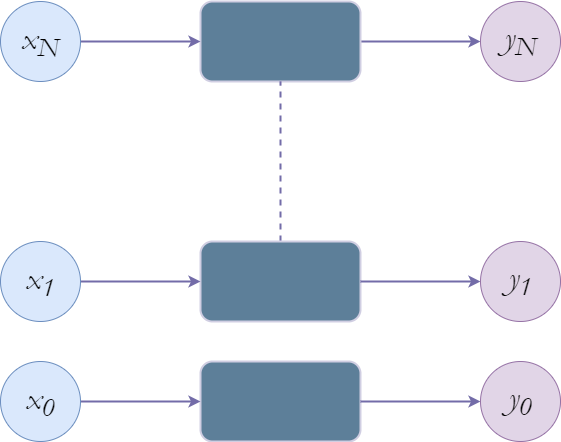

However, after applying the same feedforward model to each time step in isolation, we still don't have any notion of interdependence across time steps in our model. 

The fundamental point is that in the example above, the output $y_1$ depends both on the input $x_1$ as well as the previous input $x_0$. This relationship is captured by relating the computation at a particular time step to its prior history (its memory of the computations at the previous time steps). This is practically achieved through an internal memory, or a **state**, vector $h^t$ which encodes the notion of memory and is propagated across time steps. Thus, the output at a particular time step depends on the corresponding input as well as on the state vector of the previous time step, and can be expressed as follows:

$y^t = f(x^t, h^{t-1})$

This recurrence relation allows us to represent the whole network through a single cyclic connections, as shown below:



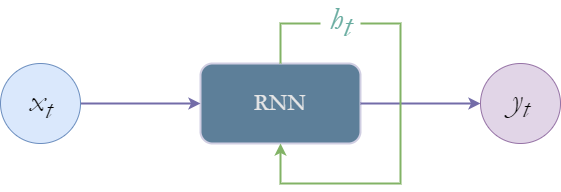

## RNNs Formalization

- Given an input vector $x_t$, it is passed into the RNN's internal state computation $h_t = f_{W_h}(x_t, h_{t-1})$, where $f_{W_h}$ is a function parameterized by a set of weights $W_h$.  

- The cell state $h_t$ is computed as $h_t=tanh(W_x^Tx_t+W_h^Th_{t-1})$.

- The output vector $y_t$ is then computed as $y_t = W_y^Th_t$.

An important point is that the set of weight matrices $W_x$, $W_h$, and $W_y$ are the same across all cells.

## RNNs Training

In order to train RNNs, we need a loss function $L$. We generate an individual loss $l_t$ for each individual time step $t$ according to the output at that time step $y_t$. These losses can then be summed to produce the total loss $L$.

The algorithm used to train RNNs is called Backpropagation through time. This consists of backpropagating errors, individually, across each time steps, and across all the time steps from the end of the sequence to its beginning.

This essentially boils down to many matrix multiplication operations. This can introduce issues such as the exploading gradients problem and the vanishing gradients problems. 

### Exploading Gradients Problem

During backpropagation, having many of the weight values greater than 1, the gradients’ values become extremely large due to the repeated multiplication operations.

A simple solution to this is gradient clipping.




### Vanishing Gradients Problem

The opposite problem occurs when our gradients values are less than 1. This sabotages our goal of having long-term dependencies because the gradients become smaller and smaller the further back in time we go. This effectively biases the model to focus on short-term dependencies and ignore the long-term ones.

This problem can be mitigated by:
- Activation Function (using ReLU).
- Weight Initialization (to the identity matrix).
- Network Architecture (LSTMs/GRUs) (most robust solution)




## RNNs Variations

### Multi-layer RNNs

Stacked RNNs generally outperform single-layer networks. One reason for this success seems to be that the network induces representations at differing levels of abstraction across layers. Just as the early stages of the human visual system detect edges that are then used for finding larger regions and shapes, the initial layers of stacked networks can induce representations that serve as useful abstractions for further layers.
The optimal number of stacked RNNs is specific to each application and to each training set. However, as the number of stacks is increased the training costs rise quickly.


### Bidirectional RNNs

Bidirectional RNNs are motivated through the following example:

Consider a Named-Entity Recognition task on the following sentence:

- "she loves apple, it keeps her healthy."
- "she loves apple, the company produces the best electronics."

In these two instances, the word "apple" refers to two different entities (the first refers to "fruit" while the second refers to "company"). However, an RNN going sequentially from left to right through these instances would lack the context provided by the rest of the instances to make an educated prediction.

A bidirectional introduces an additional RNN layer which process the input text from right to left. This allows the output at a particular time step to have contextual information from both ends of the sentence.

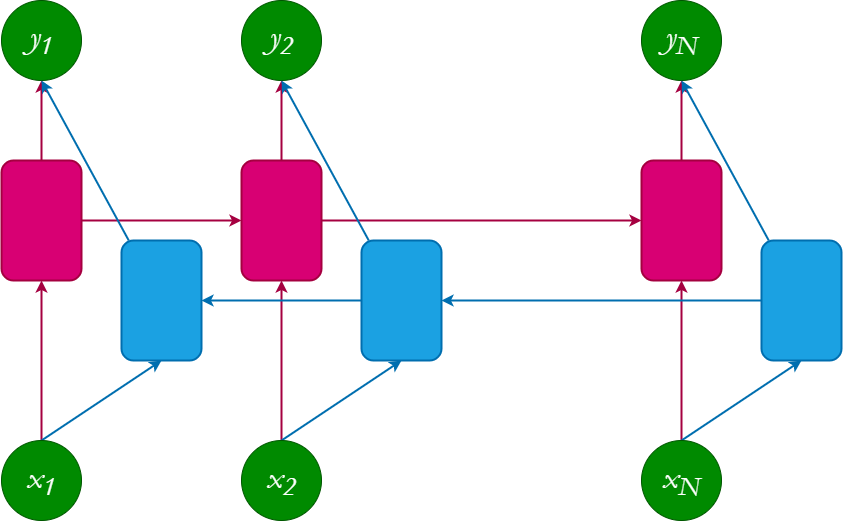

## LSTMs and GRUs

As mentioned above, due to the back propagation through time, RNNs suffer from the vanishing gradient problem. This causes the model to lose long-term dependencies, especially for longer sequences. To overcome this problem specialized versions of RNNs (LSTMs and GRUs) are used instead.

## RNN Implementation Using Keras

### Imports

In [5]:
from tensorflow import keras
from keras import layers

### Dataset Preparation

In [30]:
# Only consider the top 20k words
max_vocab_size = 20000  

# Only consider the first 512 words of each movie review
max_seq_len = 512

In [31]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_vocab_size
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_seq_len)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=max_seq_len)

25000 Training sequences
25000 Validation sequences


In [32]:
x_train.shape

(25000, 512)

In [33]:
x_train[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     1,
         785,   189,   438,    47,   110,   142,     7,     6,  7475,
         120,     4,   236,   378,     7,   153,    19,    87,   108,
         141,    17,  1004,     5,     2,   883, 10789,    23,     8,
           4,   136, 13772, 11631,     4,  7475,    43,  1076,    21,
        1407,   419,     5,  5202,   120,    91,   682,   189,  2818,
           5,     9,  1348,    31,     7,     4,   118,   785,   189,
         108,   126,    93, 13772,    16,   540,   324,    23,     6,
         364,   352,

### Model Creation

This section describes Keras's RNN layers:

- [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)
  
- [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)/[GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)

- [Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)
  - The only required argument the rnn layers need is `units` which is the dimensionality of the output space at each timestep.
  
  - All recurrent layers in Keras can be run in two different modes, which return:
    - The full sequences of outputs at each timestep: a 3D tensor of shape (`batch_size`, `timesteps`, `output_features`).
    - Only the last output for each input sequence: a 2D tensor of shape (`batch_size`, `output_features`).

    These two modes are controlled by the `return_sequences` argument. This is useful to stack multiple RNN layers, as each layer needs to access the full sequence of the previous one.

  - Finally, the `return_state` argument specifies whether to return the last state in addition to the output. 




  

In [35]:
def RNN_model(architecture):

  # Input for variable-length sequences of integers
  inputs = keras.Input(shape=(x_train.shape[1]), dtype="int32")

  # Embed each integer in a 64-dimensional vector
  x = layers.Embedding(
      input_dim=max_vocab_size, 
      output_dim=64, 
      input_length=max_seq_len)(inputs)

  if architecture == "rnn":
    # Add 1 RNN layer
    x = layers.SimpleRNN(64)(x)

  elif architecture == "lstm":
    # Add 1 LSTM layer
    x = layers.LSTM(64)(x)

  elif architecture == "stacked_lstm":
    # Add 2 LSTM layers
    x = layers.LSTM(64, return_sequences=True)(x)
    x = layers.LSTM(64)(x)

  elif architecture == "bidirectional":
    # Add 1 BiDirectional LSTM layer
    x = layers.Bidirectional(
        layers.LSTM(32)
    )(x)

  # Add a classifier
  outputs = layers.Dense(1, activation="sigmoid")(x)
  model = keras.Model(inputs, outputs)
  return model

### Training

In [36]:
model = RNN_model("stacked_lstm")
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 512)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 512, 64)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 512, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,346,113
Trainable params: 1,346,113
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
391/391 [==============================] - 411s 1s/step - loss: 0.4103 - accuracy: 0.8082 - val_loss: 0.3367 - val_accuracy: 0.8686
Epoch 2/2
391/391 [==============================] - 401s 1s/step - loss: 0.2400 - accuracy: 0.9100 - val_loss: 0.3318 - val_accuracy: 0.8578


## References

1. MIT's 6.S191 Introduction to Deep Learning: [Deep Sequential Modelling](http://introtodeeplearning.com)

2. Keras's Documentation: [Recurrent Neural Networks (RNN) with Keras](www.tensorflow.org/guide/keras/rnn)

3. *Dan Jurafsky and James H. Martin. [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/) (3rd ed. draft).*
